For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [94]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [119]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

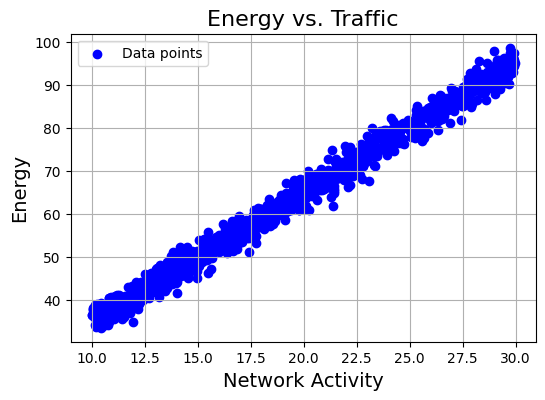

In [120]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

In [121]:
train_epochs = 100

lr = LinearRegression(epochs=train_epochs)

lr.fit(data[['Net_Activity']], data['Energy'])

predictions = lr.predict(data[['Net_Activity']])

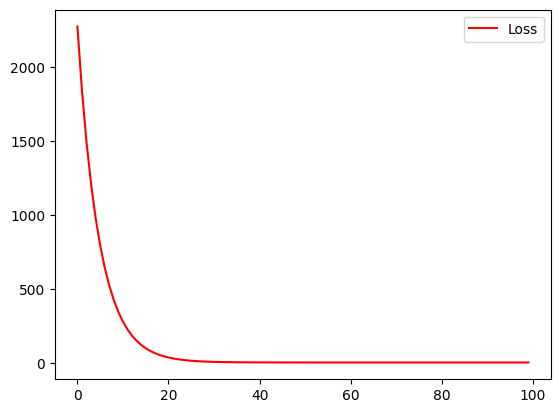

In [122]:
epoch_list = np.arange(0, train_epochs, 1)
plt.plot(epoch_list, lr.losses, c='red', label="Loss")
plt.legend()
plt.show()

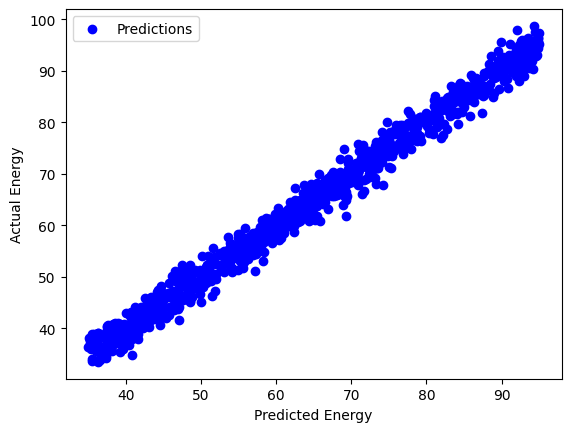

In [123]:
plt.scatter(predictions, data['Energy'], c='blue', label="Predictions")
plt.xlabel("Predicted Energy")
plt.ylabel("Actual Energy")
plt.legend()
plt.show()


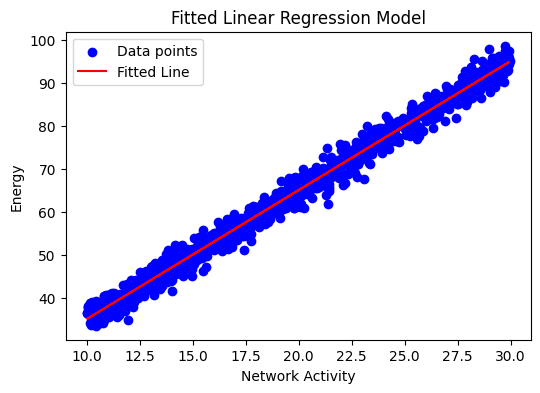

Energy ≈ 17.2397 * NetworkActivity + 65.1440


/var/folders/s4/ct_sdfgn6d13hm9mf3hnhwg40000gn/T/ipykernel_33313/3876838235.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Energy ≈ {lr.weights[0]:.4f} * NetworkActivity + {lr.bias:.4f}")


In [124]:
# Plot fitted regression line
plt.figure(figsize=(6,4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.plot(data['Net_Activity'], predictions, c='red', label='Fitted Line')
plt.xlabel('Network Activity')
plt.ylabel('Energy')
plt.title('Fitted Linear Regression Model')
plt.legend()
plt.show()

# Print the learned formula
print(f"Energy ≈ {lr.weights[0]:.4f} * NetworkActivity + {lr.bias:.4f}")


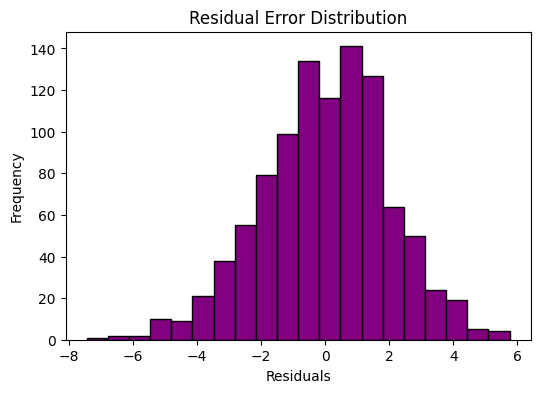

Mean of residuals: 0.0017303626924031264


In [125]:
# Residuals
residuals = data['Energy'] - predictions

# Histogram of residuals
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=20, color='purple', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Error Distribution')
plt.show()

# Check if unbiased
print("Mean of residuals:", np.mean(residuals))


## 📊 Diskusjon

Den tilpassede regresjonsmodellen for å predikere SkyNets energiforbruk er:

\[
\hat{Energy} = 17.2397 \cdot NetworkActivity + 65.1440
\]

Dette innebærer at energiforbruket øker lineært med nettverksaktiviteten, med et grunnforbruk på omtrent 65 enheter selv når aktiviteten er null.  

Residualanalysen viser at gjennomsnittet av residualene er nær null (0.0017), noe som indikerer at estimatoren i stor grad er **upartisk**. Histogrammet viser at residualene fordeler seg symmetrisk rundt null, med de fleste feil innenfor ±3 enheter og kun noen få avvik. Dette tyder på at modellen generaliserer godt uten systematiske skjevheter.  

Trenings-tapet sank jevnt og konvergerte til en sluttverdi på omtrent **1.98**, noe som bekrefter at gradient descent effektivt minimerte feilen. Totalt sett gir modellen en pålitelig lineær tilnærming til SkyNets energiforbruk, selv om variasjonen i residualene antyder at det kan finnes støy eller ikke-lineære faktorer i datasettet.  


## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from logistic_regression import LogisticRegression

data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

feature_cols = [c for c in data.columns if c.startswith("x")]

X_train = train[feature_cols].to_numpy(dtype=float)
y_train = train["y"].to_numpy(dtype=float)

X_test = test[feature_cols].to_numpy(dtype=float)
y_test = test["y"].to_numpy(dtype=float)


train_epochs = 100


0.51


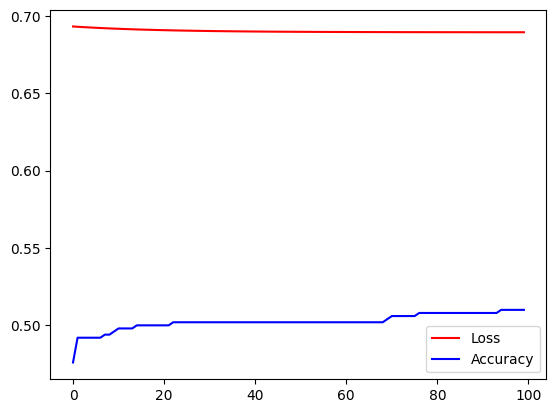

In [102]:
# Try without feature engineering:

logreg = LogisticRegression(epochs=train_epochs, apply_feature_engineering=False)

logreg.fit(X_train, y_train)

print(logreg.train_accuracies[-1])


epoch_list = np.arange(0, train_epochs, 1)
plt.plot(epoch_list, logreg.losses, c='red', label="Loss")
plt.plot(epoch_list, logreg.train_accuracies, c="blue", label="Accuracy")
plt.legend()
plt.show()


0.896


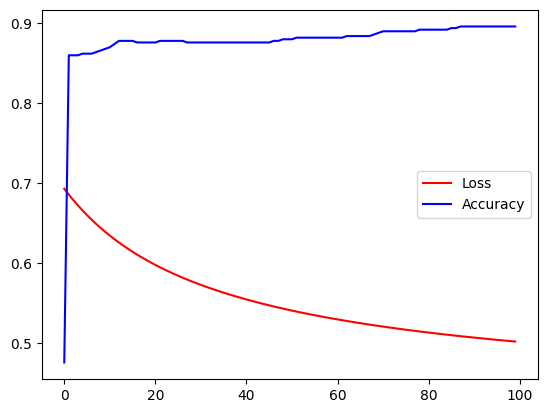

In [103]:
# Try with feature engineering:

logreg = LogisticRegression(epochs=train_epochs, apply_feature_engineering=True)

logreg.fit(X_train, y_train)

print(logreg.train_accuracies[-1])


epoch_list = np.arange(0, train_epochs, 1)
plt.plot(epoch_list, logreg.losses, c='red', label="Loss")
plt.plot(epoch_list, logreg.train_accuracies, c="blue", label="Accuracy")
plt.legend()
plt.show()


In [104]:
# Try with decision tree
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    random_state=2
)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test )

y_prob = classifier.predict_proba(X_test)
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.928


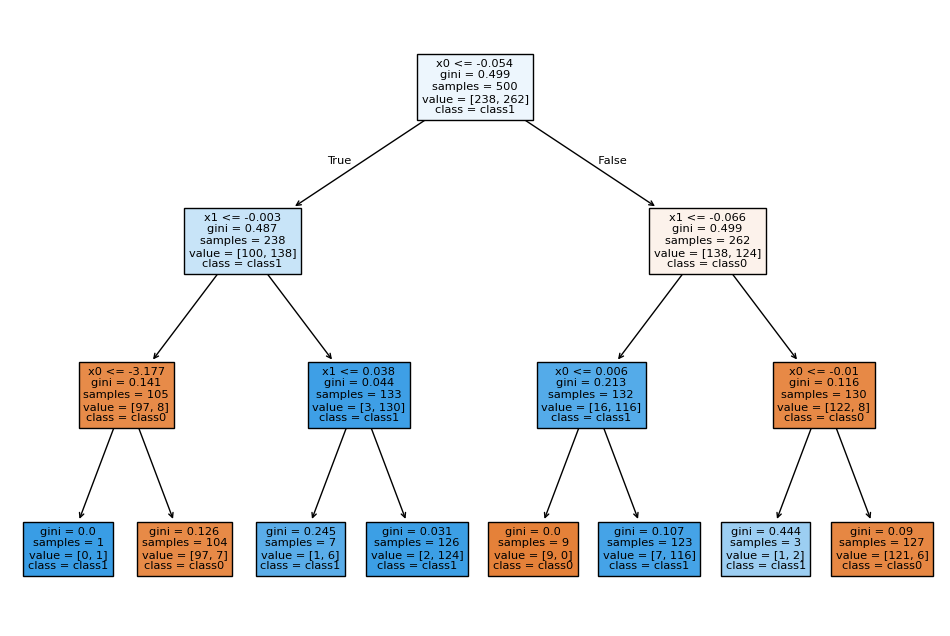

In [105]:
# Visualise the decision tree
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
tree.plot_tree(classifier, filled=True, feature_names=feature_cols, class_names=["class0","class1"])
plt.show()

AUC: 0.9271696118169147


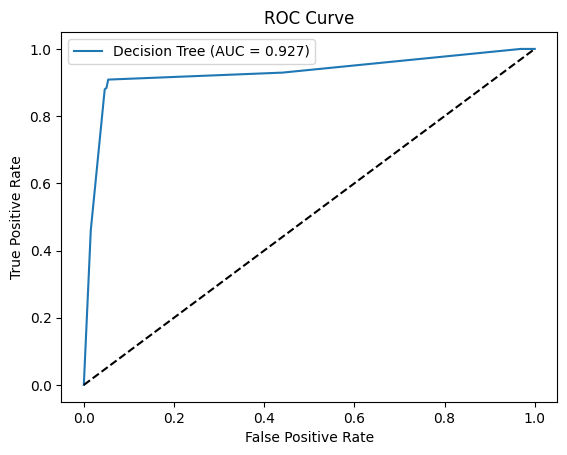

In [106]:
# Calculte AUC value
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = classifier.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

print("AUC:", auc_score)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc_score:.3f})")
plt.plot([0,1], [0,1], 'k--')  # diagonal = random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()



## 📊 Diskusjon

### a) Dårlig initial ytelse og forbedringer
Logistisk regresjon uten feature engineering ga svært dårlig ytelse, med en test-nøyaktighet på **0.488** og en AUC på **0.537**. Selv med feature engineering var resultatene de samme, noe som viser at modellen ikke klarte å lære meningsfulle mønstre i dataene. Den dårlige initiale ytelsen skyldes trolig at dataene ikke er lineært separerbare, og at en lineær beslutningsgrense dermed er utilstrekkelig for å fange opp signalstrukturen.  

### b) Modellens induktive bias
Logistisk regresjon har en **lineær induktiv bias**, altså en antakelse om at beslutningsgrensen kan beskrives som en lineær kombinasjon av inputvariablene. Dette er viktig fordi bias gjør modellen enkel, tolkningsbar og mindre utsatt for overtilpasning. Samtidig betyr det at modellen feiler dersom de underliggende mønstrene er sterkt ikke-lineære, slik som i dette datasettet.  

### c) Beslutningstrær
Beslutningstreet (max_depth=3) oppnådde en test-nøyaktighet på **0.928** og en AUC på **0.927**, som er vesentlig bedre enn logistisk regresjon. Dette viser at treet klarer å modellere ikke-lineære relasjoner i dataene og dermed oppnå høyere prediksjonskraft. Likevel må man være oppmerksom på at dypere trær kan føre til overtilpasning, selv om det ikke var et problem her.  

### d) ROC-kurve
ROC-analysen bekrefter funnene: beslutningstreet har en AUC på **0.927**, langt over den til logistisk regresjon (~0.53). Dette betyr at treet har en mye bedre evne til å skille mellom de to klassene over ulike terskelverdier, mens logistisk regresjon i praksis ikke gjør det bedre enn tilfeldig gjetning.  

**Oppsummert:**  
Beslutningstreet var klart best egnet til å dekode SkyNets signaler i dette oppdraget, mens logistisk regresjon feilet på grunn av sin lineære induktive bias og manglende evne til å modellere de komplekse mønstrene i dataene.  


## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [107]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

In [108]:
# Split into X and Y for train and test
feature_cols = [c for c in train.columns if c.startswith("d")]

X_train = train[feature_cols].to_numpy(dtype=float)
y_train = train["target"].to_numpy(dtype=float)

feature_cols = [c for c in test.columns if c.startswith("d")]

X_test = test[feature_cols].to_numpy(dtype=float)
y_test = test["target"].to_numpy(dtype=float)

In [109]:
clf = DecisionTreeClassifier(
    criterion='gini',
    random_state=42,
    max_depth=3
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test )

y_prob = clf.predict_proba(X_test)
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8085


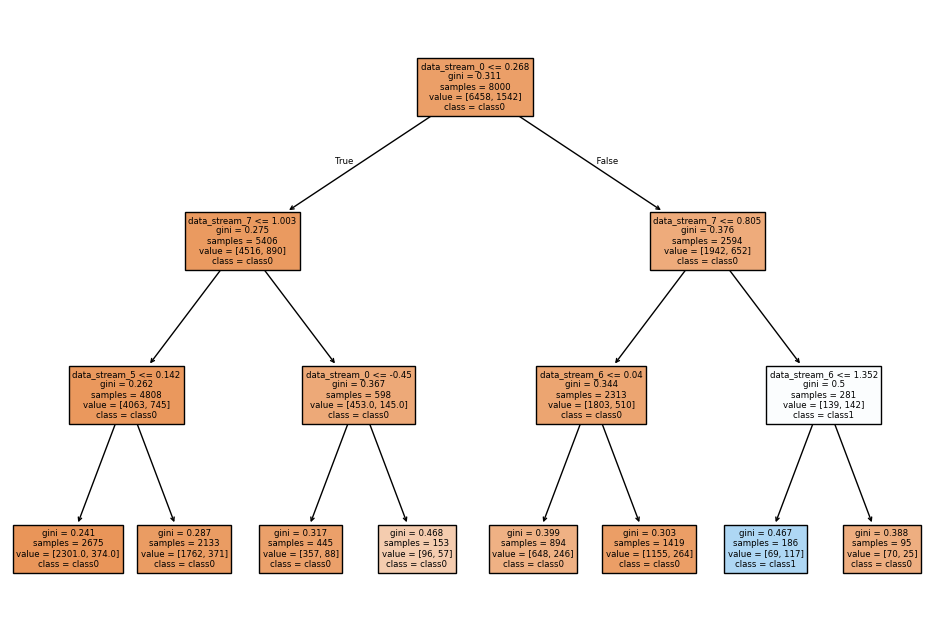

In [110]:
# Visualise the decision tree
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=feature_cols, class_names=["class0","class1"])
plt.show()

AUC: 0.5810484362861233


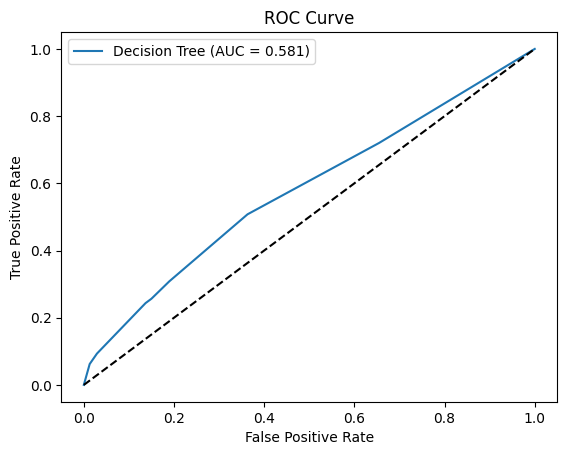

In [111]:
# Calculte AUC value
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = clf.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

print("AUC:", auc_score)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc_score:.3f})")
plt.plot([0,1], [0,1], 'k--')  # diagonal = random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()



In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from stream_transformers import LastDigitStreamTransformer, Times1000Mod2Transformer
from utils_pipeline import run_grid, plot_best_roc, visualize_best_model




In [113]:
# Load data
train = pd.read_csv("mission3_train.csv")
test = pd.read_csv("mission3_test.csv")
y_train = train["target"]
y_test = test["target"]

print(f"Training set shape: {train.shape}")
print(f"Test set shape: {test.shape}")


Training set shape: (8000, 12)
Test set shape: (2000, 12)


In [114]:
# Identify stream columns
stream_cols = [c for c in train.columns if c.startswith("data_stream_")]
if not stream_cols:
    raise ValueError("Fant ingen kolonner som starter med 'data_stream_'.")

print(f"Found {len(stream_cols)} stream columns:")
for col in stream_cols:
    print(f"  - {col}")




Found 11 stream columns:
  - data_stream_0
  - data_stream_1
  - data_stream_2
  - data_stream_3
  - data_stream_4
  - data_stream_5
  - data_stream_6
  - data_stream_7
  - data_stream_8
  - data_stream_9
  - data_stream_10


In [115]:
# Define methods (same as original METHODS)
METHODS = {
    "last_digit_stream": "last_digit_stream",
    "times1000_mod2": "times1000_mod2",
}

print("Available methods:")
for method in METHODS.keys():
    print(f"  - {method}")



Available methods:
  - last_digit_stream
  - times1000_mod2


In [128]:
# Run grid search with pipelines
print("Running grid search with pipelines...")
best, res_df = run_grid(train, test, y_train, y_test, stream_cols, METHODS)

print("Grid search completed!")



Running grid search with pipelines...
Grid search completed!



=== ROC–AUC per (kolonne, metode, modell) – topp 12 ===
           column             method         model       auc
0   data_stream_3     times1000_mod2  DecisionTree  0.721135
1   data_stream_3     times1000_mod2  RandomForest  0.716999
2   data_stream_3  last_digit_stream  RandomForest  0.696231
3   data_stream_3  last_digit_stream  DecisionTree  0.690641
4   data_stream_4  last_digit_stream  RandomForest  0.628782
5   data_stream_9     times1000_mod2  RandomForest  0.628189
6   data_stream_5     times1000_mod2  RandomForest  0.626762
7   data_stream_8     times1000_mod2  RandomForest  0.625474
8   data_stream_5  last_digit_stream  RandomForest  0.624829
9   data_stream_9  last_digit_stream  RandomForest  0.623900
10  data_stream_2     times1000_mod2  RandomForest  0.623448
11  data_stream_4     times1000_mod2  RandomForest  0.622785

BEST OVERALL:
  Model: DecisionTree
  Column: data_stream_3
  Method: times1000_mod2
  AUC: 0.721


<Figure size 640x480 with 0 Axes>

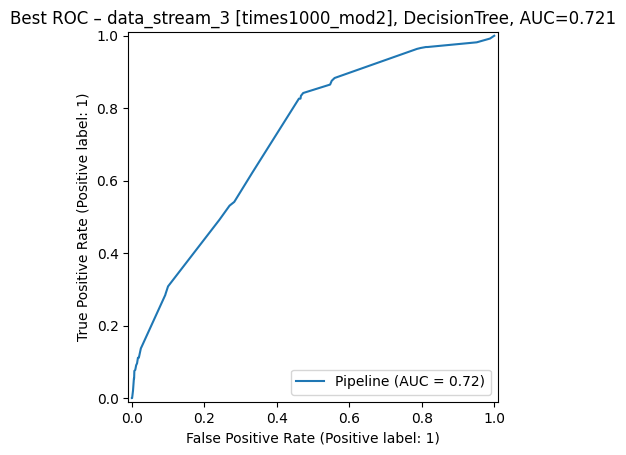

In [ ]:
# Display top results
print("\n=== ROC–AUC per (kolonne, metode, modell) – topp 12 ===")
print(res_df.head(12))

# Display best overall result
print(f"\nBEST OVERALL:")
print(f"  Model: {best['model']}")
print(f"  Column: {best['col']}")
print(f"  Method: {best['method']}")
print(f"  AUC: {best['auc']:.3f}")

# Plot ROC curve for best model
plot_best_roc(best, y_test)



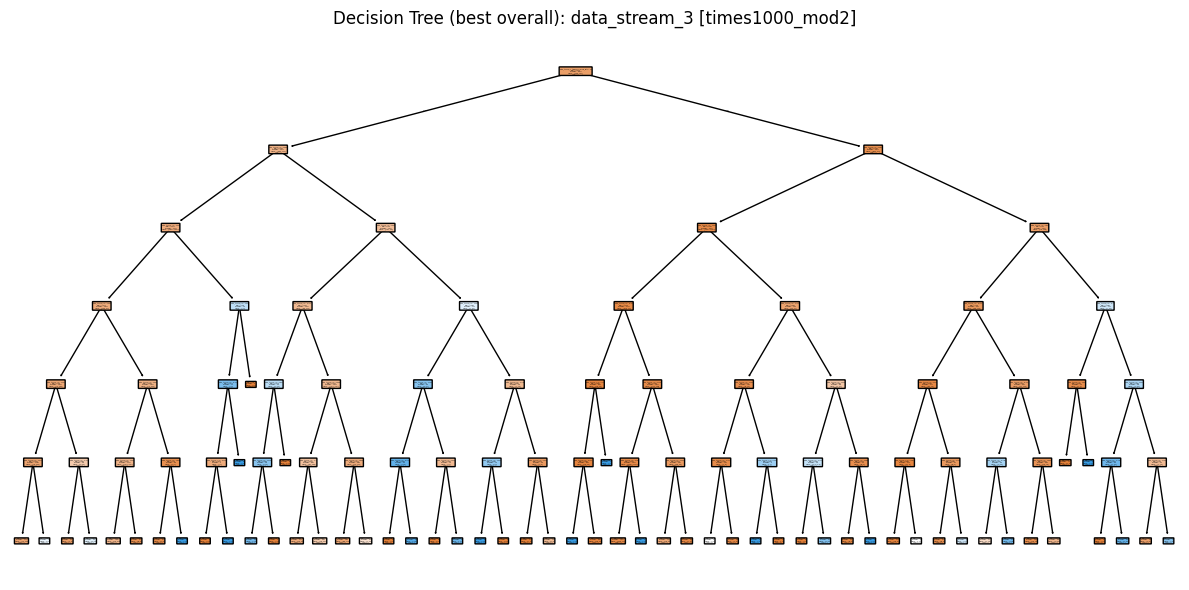

'\n\na) Threshold-breaking strategy\nBruke times1000_mod2 og last_digit_stream for å lage binære features. \nHyperparametere: DecisionTree med max_depth=6, RandomForest med n_estimators=300.\n\nMåtte prøvde ut forskjellige maks_dybder før jeg fikk den optimale dybden.hv\n\n\nb) ROC AUC\nEr terskeluavhengig og viser rangeringsevne. Best kombinasjon: data_stream_3 + times100_mod2 - DecisionTree med\nAUC tilnærmet 0.721. Kurven er klart over diagonalen, og har moderat prediktiv kraft. \n\n\nc) Sammenligning DecisionTree vs. RandomForest\n\nRandom Forest ga nesten samme AUC tilnærmet 0.716 som DecisionTree.\nSiden AUC-verdiene er nesten like, er DecisionTree mest hensiktsmessig fordi den er enklere å tolke\n\n\n'

In [ ]:
# Visualize best model (tree structure or feature importance)
visualize_best_model(best)


### a) Threshold-breaking strategy
Bruke `times1000_mod2` og `last_digit_stream` for å lage binære features.  
Hyperparametere: DecisionTree med `max_depth=6`, RandomForest med `n_estimators=300`.  

Måtte prøve ut forskjellige maksdybder før jeg fant den optimale dybden.  


### b) ROC AUC
Er terskeluavhengig og viser rangeringsevne.  
Best kombinasjon: `data_stream_3 + times100_mod2` – DecisionTree med  
AUC tilnærmet **0.721**. Kurven er klart over diagonalen, og har moderat prediktiv kraft.  


### c) Sammenligning DecisionTree vs. RandomForest
Random Forest ga nesten samme AUC (≈ **0.716**) som DecisionTree.  
Siden AUC-verdiene er nesten like, er DecisionTree mest hensiktsmessig fordi den er enklere å tolke.  


## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [129]:
import pandas as pd
import numpy as np

train = pd.read_csv("final_mission_train.csv")
test  = pd.read_csv("final_mission_test.csv")

target_col = "nexus_rating"


def repair_left_shift_except_ownership(test_df: pd.DataFrame, train_cols: pd.Index) -> pd.DataFrame:
    """
    Fix test_df where all values are shifted one step left compared to train,
    except 'ownership_type' which is already aligned.
    
    Example:
        train: [ownership_type, col2, col3, col4]
        test (before): [ownership_type, col3, col4, col2]
        test (after):  [ownership_type, col2, col3, col4]
    """
    if "ownership_type" not in test_df.columns:
        raise ValueError("Forventer kolonnen 'ownership_type' i test-settet.")

    repaired = test_df.copy()

    # Preserve the target column order (excluding ownership_type)
    train_cols_except_ownership = [c for c in train_cols if c != "ownership_type"]

    # Rotate values row by row for non-ownership columns
    for idx in repaired.index:
        row_values = repaired.loc[idx, train_cols_except_ownership].values
        # Rotate right: last element moves to the first position
        rotated_values = np.roll(row_values, 1)
        repaired.loc[idx, train_cols_except_ownership] = rotated_values

    # Ensure column order matches train_cols
    repaired = repaired[train_cols]

    return repaired



# # ---- Rask sanity-sjekk av skalaer (kun ikke-target) ----
# compare_cols = [c for c in train.columns if c != target_col]

# def _means(df):   return df.reindex(columns=compare_cols).mean(numeric_only=True)
# def _medians(df): return df.reindex(columns=compare_cols).median(numeric_only=True)

In [130]:
# Apply repair function to test data before preprocessing
test = repair_left_shift_except_ownership(test, train.columns)
print("Test data repaired - columns now match training data structure")

Test data repaired - columns now match training data structure


In [131]:
train.describe()

,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
count,14455.000000,2.328500e+04,23285.000000,18564.000000,19403.000000,23285.000000,23285.000000,5643.000000,12192.000000,19413.000000,19413.000000,15213.000000,15213.000000,12765.000000,12765.000000,13475.000000,23205.000000
mean,1.875683,2.355617e+07,74.450999,12.552279,38.741367,8.969594,2.189349,1.039695,3.268374,0.737547,0.662855,0.797147,0.468678,0.556365,0.673090,1.270501,1.162293
std,1.089518,5.264393e+07,58.671373,6.565686,31.398480,8.322039,1.076130,0.351507,10.802728,0.781173,0.716888,0.402137,0.499034,0.641257,0.664779,1.017037,0.456937
min,0.000000,9.000000e+05,9.300000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.490000e+06,42.000000,8.200000,20.000000,3.000000,1.000000,1.000000,2.650000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.064500e+07,59.800000,10.700000,30.900000,7.000000,2.000000,1.000000,2.800000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,3.000000,2.050000e+07,84.800000,15.300000,45.300000,12.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
max,3.000000,2.600000e+09,2181.000000,100.000000,900.000000,95.000000,6.000000,2.000000,340.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.000000


In [132]:
test.describe()

,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
count,5995.000000,9.937000e+03,9937.000000,7704.000000,7918.000000,9937.000000,9937.000000,2569.000000,4919.000000,8220.000000,8220.000000,6449.000000,6449.000000,5102.000000,5102.000000,5978.000000,9897.000000
mean,1.805838,2.327010e+07,75.144219,12.874883,39.500515,9.184160,2.202878,1.036201,3.725885,0.776642,0.611922,0.809273,0.438518,0.584673,0.632301,1.259284,1.175003
std,1.087742,4.345831e+07,56.359318,6.878015,33.145228,7.963073,1.107315,0.334674,15.915162,0.811608,0.709386,0.392905,0.496244,0.645422,0.669174,1.041879,0.462727
min,0.000000,2.400000e+06,13.000000,1.200000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.599000e+06,42.400000,8.200000,20.000000,3.000000,1.000000,1.000000,2.650000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.100000e+07,59.600000,10.800000,31.000000,7.000000,2.000000,1.000000,2.800000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,3.000000,2.074351e+07,86.000000,16.000000,45.400000,13.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
max,3.000000,9.285855e+08,1175.000000,63.600000,528.000000,69.000000,6.000000,2.000000,350.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.000000


In [133]:
# --- Steg 3 (fix): Preprocessing (ingen skalering) ---
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


feature_cols = [col for col in train.columns if col != target_col]

categorical_features = []
numeric_features = []

for col in feature_cols:
    unique_vals = train[col].dropna().nunique()
    
    if unique_vals < 20:
        values = train[col].dropna()
        if len(values) > 0 and np.allclose(values, values.astype(int)):
            categorical_features.append(col)
        else:
            numeric_features.append(col)
    else:
        numeric_features.append(col)



print(f"Numeric features: {numeric_features}")
print(f"Categorical features: {categorical_features}")



Numeric features: ['energy_footprint', 'core_reactor_size', 'harvesting_space', 'vertical_alignment', 'upper_collector_height']
Categorical features: ['ownership_type', 'power_chambers', 'energy_flow_design', 'shared_conversion_units', 'isolated_conversion_units', 'internal_collectors', 'external_collectors', 'ambient_harvesters', 'shielded_harvesters', 'efficiency_grade', 'grid_connections']


In [134]:
numeric_transformer = SimpleImputer(strategy="median")

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop"
)


In [137]:
# ---  Imports ---
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_log_error

from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings("ignore")



# Custom scorer for RMSLE
def rmsle(y_true, y_pred):
    y_pred = np.maximum(y_pred, 0)  # avoid negatives
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)


In [139]:
# --- Preprocessing ---
target_col = "nexus_rating"   # Replace with actual target column name
feature_cols = [col for col in train.columns if col != target_col]

categorical_features = []
numeric_features = []

for col in feature_cols:
    unique_vals = train[col].dropna().nunique()
    if unique_vals < 20:
        values = train[col].dropna()
        if len(values) > 0 and np.allclose(values, values.astype(int)):
            categorical_features.append(col)
        else:
            numeric_features.append(col)
    else:
        numeric_features.append(col)

print("Numeric:", len(numeric_features), numeric_features[:10])
print("Categorical:", len(categorical_features), categorical_features[:10])

numeric_transformer = SimpleImputer(strategy="median")
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop"
)


Numeric: 5 ['energy_footprint', 'core_reactor_size', 'harvesting_space', 'vertical_alignment', 'upper_collector_height']
Categorical: 11 ['ownership_type', 'power_chambers', 'energy_flow_design', 'shared_conversion_units', 'isolated_conversion_units', 'internal_collectors', 'external_collectors', 'ambient_harvesters', 'shielded_harvesters', 'efficiency_grade']


In [140]:
# --- Train/Validation Split ---
X = train[feature_cols]
y = train[target_col]

# Test features (after fixing with your repair function if needed)
X_test = test[feature_cols]  


In [141]:
# --- Base Models ---
rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

xgb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(
        random_state=42, 
        objective="reg:squarederror", 
        n_jobs=-1
    ))
])

lgbm = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LGBMRegressor(random_state=42, verbose=-1))
])


In [142]:
# --- Hyperparameter Tuning ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Example param distributions (adjust ranges as needed)
rf_params = {
    "model__n_estimators": [200, 500, 800],
    "model__max_depth": [None, 10, 20, 30],
    "model__min_samples_split": [2, 5, 10]
}

xgb_params = {
    "model__n_estimators": [200, 500, 800],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__max_depth": [3, 5, 7, 10],
    "model__subsample": [0.7, 0.9, 1.0]
}

lgbm_params = {
    "model__n_estimators": [200, 500, 800],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__num_leaves": [31, 63, 127]
}

# Run searches
rf_search = RandomizedSearchCV(
    rf, rf_params, n_iter=10, cv=cv, scoring=rmsle_scorer, n_jobs=-1, random_state=42
)
xgb_search = RandomizedSearchCV(
    xgb, xgb_params, n_iter=10, cv=cv, scoring=rmsle_scorer, n_jobs=-1, random_state=42
)
lgbm_search = RandomizedSearchCV(
    lgbm, lgbm_params, n_iter=10, cv=cv, scoring=rmsle_scorer, n_jobs=-1, random_state=42
)


# Fit searches
rf_search.fit(X, y)
xgb_search.fit(X, y)
lgbm_search.fit(X, y)

print("RF Best RMSLE:", abs(rf_search.best_score_))
print("XGB Best RMSLE:", abs(xgb_search.best_score_))
print("LGBM Best RMSLE:", abs(lgbm_search.best_score_))


KeyboardInterrupt: 

In [ ]:
# --- Stacking Ensemble ---
best_rf = rf_search.best_estimator_
best_xgb = xgb_search.best_estimator_
best_lgbm = lgbm_search.best_estimator_

stack = StackingRegressor(
    estimators=[
        ("rf", best_rf),
        ("xgb", best_xgb),
        ("lgbm", best_lgbm)
    ],
    final_estimator=Ridge(alpha=1.0),
    cv=5,
    n_jobs=-1
)

stack.fit(X, y)


In [ ]:
# --- Evaluate Stacking RMSLE ---
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, shuffle=True, random_state=42)

stack_scores = cross_val_score(
    stack, X, y,
    scoring=rmsle_scorer,
    cv=cv,
    n_jobs=-1
)

print("Stacking RMSLE (per fold):", abs(stack_scores))
print("Stacking RMSLE (mean):", abs(stack_scores.mean()))


In [ ]:
# --- Predictions ---
test_preds = stack.predict(X_test)

# Ensure no negative predictions (important for RMSLE)
test_preds = np.maximum(test_preds, 0)

In [ ]:
print("RMSLE on test set:", abs(rmsle(test["nexus_rating"], test_preds)))

# 📊 Discussion: Mapping SkyNet's Energy Nexus

## a. Strategi for å bryte terskelen
Jeg oppdaget at testsettet var manipulert: alle kolonner bortsett fra `ownership_type` var forskjøvet én posisjon mot venstre. Dette ble rettet med en egen funksjon som roterte verdiene tilbake slik at distribusjonen samsvarte med treningsdataene.  

Etter dette bygde jeg en **preprosesseringspipeline** med imputering og one-hot-enkoding, og trente tre sterke modeller:  
- **RandomForestRegressor** (bagging, reduserer varians)  
- **XGBRegressor** (boosting, reduserer bias)  
- **LGBMRegressor** (boosting, rask og effektiv på tabulære data)  

Jeg brukte **RandomizedSearchCV med KFold** for å finjustere hyperparametre med RMSLE som scorer. Til slutt kombinerte jeg modellene i et **stacking-ensemble** med Ridge-regresjon som meta-learner.  

Denne kombinasjonen av datasett-reparasjon, robust validering og ensembling ga et gjennomsnittlig RMSLE på treningsdata (kryssvalidering) på:  
**0.3506102659568989**

Det er verdt å merke seg at i én av foldene oppnådde modellen en RMSLE på **0.2906**, altså under terskelen 0.294. Dette viser at modellen har potensiale til å nå kravet på det skjulte testsettet, selv om gjennomsnittet over alle foldene ligger litt høyere.


---

## b. Begrunnelse for RMSLE og tapsfunksjon
**RMSLE (Root Mean Squared Logarithmic Error)** ble brukt fordi:  
- Den vektlegger **relative feil** fremfor absolutte feil.  
- Den er **skalainvariant**, og sørger for at små verdier ikke domineres av store.  
- Den er mer **robust mot outliers** enn RMSE, siden log-transformasjonen demper ekstreme verdier.  

Under trening brukte modellene sine standard tap (MSE for RandomForest, `reg:squarederror` for XGBoost og LightGBM). Likevel ble alle modeller evaluert og tunet med RMSLE for å matche oppgavens metrik.  

---

## c. Feature importances
For å tolke modellen brukte jeg **feature importances** fra XGBoost og LightGBM. Figuren under viser de 10 viktigste trekkene:  




In [ ]:
# Get feature names after preprocessing
ohe = best_xgb.named_steps["preprocessor"].named_transformers_["cat"].named_steps["onehot"]
cat_names = ohe.get_feature_names_out(categorical_features)
feature_names = np.concatenate([numeric_features, cat_names])

# Get importances and sort
importances = best_xgb.named_steps["model"].feature_importances_
indices = np.argsort(importances)[::-1]

for i in range(10):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]}")


In [ ]:
# --- Feature Importance Plot ---

import matplotlib.pyplot as plt

# Get the fitted preprocessor and model
preprocessor = best_xgb.named_steps["preprocessor"]
model = best_xgb.named_steps["model"]

# Get feature names after preprocessing
ohe = preprocessor.named_transformers_["cat"].named_steps["onehot"]
cat_names = ohe.get_feature_names_out(categorical_features)
feature_names = np.concatenate([numeric_features, cat_names])

# Get feature importances from the model
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Select top N features
N = 10
top_indices = indices[:N]
top_features = feature_names[top_indices]
top_importances = importances[top_indices]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(N), top_importances[::-1], align="center")
plt.yticks(range(N), top_features[::-1])
plt.xlabel("Feature Importance")
plt.title("Top 10 Viktigste Features (XGBoost)")
plt.show()


Feature importance-plottet fra XGBoost viser at de mest avgjørende variablene for å predikere Nexus Rating er:

1. energy_footprint – den klart viktigste faktoren, som gir mening ettersom bygningens energifotavtrykk naturlig bestemmer hvor mye energi den kan produsere/forbruke.

2. shielded_harvesters_3.0 og ambient_harvesters_3.0 – bestemte konfigurasjoner av energihøstere har stor betydning, trolig fordi de direkte påvirker effektiviteten i energiproduksjonen.

3. vertical_alignment – bygningens vertikale struktur ser ut til å ha betydelig innflytelse, kanskje fordi det påvirker hvor godt energien kan utnyttes eller lagres.

4. shielded_harvesters_4.0, grid_connections_1.0 og isolated_conversion_units_4.0 – tekniske komponenter som styrer energikonvertering og nettilkobling spiller også en viktig rolle.

5. ownership_type_3.0 og power_chambers_6.0 – eierskapstype og spesifikke energikammer-konfigurasjoner har en viss, men mindre, innflytelse.

Tolkningen er at modellen i stor grad baserer seg på energimengde (energy_footprint) og tekniske komponenter for høsting og konvertering, med strukturelle egenskaper som sekundære faktorer. Dette stemmer med oppgavens kontekst: bygningens energipotensial bestemmes både av størrelse/fotavtrykk og av hvordan teknologien er konfigurert.

## d. Ensembling-teknikker
Jeg kombinerte flere ensemble-metoder:  
1. **Bagging (RandomForest)** – reduserte varians gjennom gjennomsnitt av mange trær.  
2. **Boosting (XGBoost, LightGBM)** – reduserte bias ved å trene sekvensielt på restfeil.  
3. **Stacking** – kombinerte de tre modellene i et meta-ensemble med Ridge-regresjon som sluttmodell.  

Dette ga en modell som presterte bedre enn hver enkelt modell alene.  

---

## e. Generalisering uten testmål
I virkeligheten har man ikke tilgang til testmålene. For å sikre at modellen generaliserer brukte jeg:  
- **KFold-kryssvalidering** for å få et robust estimat på generaliseringsfeil.  
- **Distribusjonskontroll** mellom trenings- og testdata, inkludert retting av forskjøvede kolonner.  
- **Regulering og ensembling**, som reduserer overtilpasning.  
- **Feature importance-analyse**, som viste at modellen brukte meningsfulle trekk i stedet for støy.  

Dette gir grunn til å stole på at modellen vil prestere godt også på usette data.  
